In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
import decoupler as dc

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
tissue = 'Gastrocnemius'

In [3]:
plate_palette = sns.color_palette("husl", n_colors=3)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


In [4]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_processed_subclustered_res0.4.h5ad')



In [5]:
adata

AnnData object with n_obs × n_vars = 819708 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'leiden_R'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_R', 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'gene_expression

In [6]:
adata.obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                         
F12_B6_G1_Subpool_4_igvf_010   045_129S1J_10M_16     NA  igvf_010  Subpool_4   
C9_A10_D11_Subpool_4_igvf_010      026_AJ_10F_16     NA  igvf_010  Subpool_4   
A10_G12_E1_Subpool_4_igvf_010     017_B6J_10M_16     NA  igvf_010  Subpool_4   
D12_C11_G3_Subpool_4_igvf_010    085_PWKJ_10M_16     NA  igvf_010  Subpool_4   
B9_A12_F10_Subpool_4_igvf_010    070_NODJ_10F_16     NA  igvf_010  Subpool_4   

                              SampleType         Tissue     Sex     Age  \
cellID                                                                    
F12_B6_G1_Subpool_4_igvf_010      Nuclei  Gastrocnemius    Male  PNM_02   
C9_A10_D11_Subpool_4_igvf_010     Nuclei  Gastrocnemius  Female  PNM_02   
A10_G12_E1_Subpool_4_igvf_010     Nuclei  Gastrocnemius    Male  PNM_02   
D12_C11_G3_Subpool_4_igvf_010     Nuclei  Gastrocnemius    Male  PNM_02   
B9_A12_F10_Subpool_4_igvf_010     Nuclei  Gastrocnemius  Female  PNM_02   

                              Genotype subpool_type  ... total_counts_mt_cb  \
cellID                                               ...                      
F12_B6_G1_Subpool_4_igvf_010    129S1J           NO  ...                7.0   
C9_A10_D11_Subpool_4_igvf_010       AJ           NO  ...                5.0   
A10_G12_E1_Subpool_4_igvf_010      B6J           NO  ...                8.0   
D12_C11_G3_Subpool_4_igvf_010     PWKJ           NO  ...               15.0   
B9_A12_F10_Subpool_4_igvf_010     NODJ           NO  ...                3.0   

                              pct_counts_mt_cb doublet_score  \
cellID                                                         
F12_B6_G1_Subpool_4_igvf_010          0.011029      0.150838   
C9_A10_D11_Subpool_4_igvf_010         0.009244      0.170909   
A10_G12_E1_Subpool_4_igvf_010         0.019622      0.157895   
D12_C11_G3_Subpool_4_igvf_010         0.039162      0.152416   
B9_A12_F10_Subpool_4_igvf_010         0.009022      0.108742   

                              predicted_doublet background_fraction  \
cellID                                                                
F12_B6_G1_Subpool_4_igvf_010              False            0.002609   
C9_A10_D11_Subpool_4_igvf_010             False            0.001864   
A10_G12_E1_Subpool_4_igvf_010             False            0.002032   
D12_C11_G3_Subpool_4_igvf_010             False            0.004341   
B9_A12_F10_Subpool_4_igvf_010             False            0.008676   

                              cell_probability     cell_size  \
cellID                                                         
F12_B6_G1_Subpool_4_igvf_010          0.999955  25984.625000   
C9_A10_D11_Subpool_4_igvf_010         0.999955  22219.892578   
A10_G12_E1_Subpool_4_igvf_010         0.999955  16961.167969   
D12_C11_G3_Subpool_4_igvf_010         0.999955  16142.116211   
B9_A12_F10_Subpool_4_igvf_010         0.999955  14029.944336   

                              droplet_efficiency leiden leiden_R  
cellID                                                            
F12_B6_G1_Subpool_4_igvf_010            2.499986     15       15  
C9_A10_D11_Subpool_4_igvf_010           2.499726     17       17  
A10_G12_E1_Subpool_4_igvf_010           2.490600     17       17  
D12_C11_G3_Subpool_4_igvf_010           2.468910     17       17  
B9_A12_F10_Subpool_4_igvf_010           2.491544     16       16  

[5 rows x 49 columns]

In [7]:
adata.var.head()

gene_id      gene_name     mt  highly_variable  \
gene_name                                                                    
4933401J01Rik  ENSMUSG00000102693.2  4933401J01Rik  False            False   
Gm26206        ENSMUSG00000064842.3        Gm26206  False            False   
Xkr4           ENSMUSG00000051951.6           Xkr4  False             True   
Gm18956        ENSMUSG00000102851.2        Gm18956  False            False   
Gm37180        ENSMUSG00000103377.2        Gm37180  False            False   

                      means  dispersions  dispersions_norm  
gene_name                                                   
4933401J01Rik  6.732575e-06     1.708154         -0.583826  
Gm26206        1.000000e-12          NaN               NaN  
Xkr4           8.761822e-02     3.596928          2.874566  
Gm18956        6.965695e-05     1.906480         -0.220687  
Gm37180        1.414392e-03     2.593442          1.037159

In [8]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

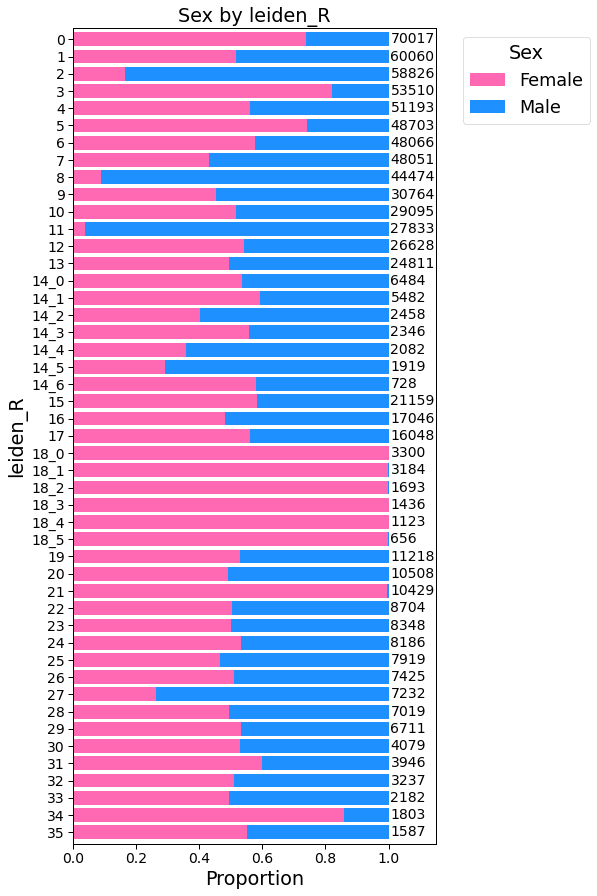

In [9]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'Sex',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = sex_palette,
                            annotations = True)


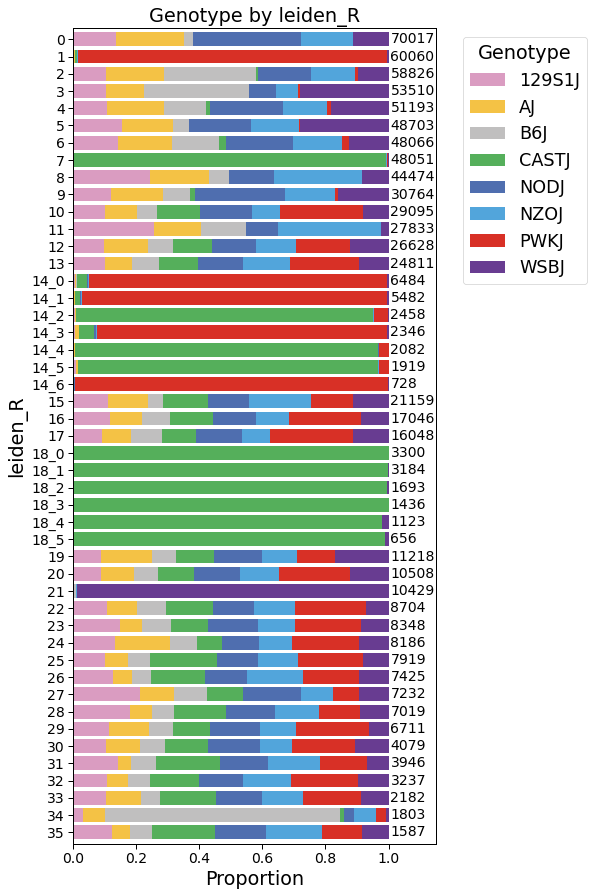

In [10]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


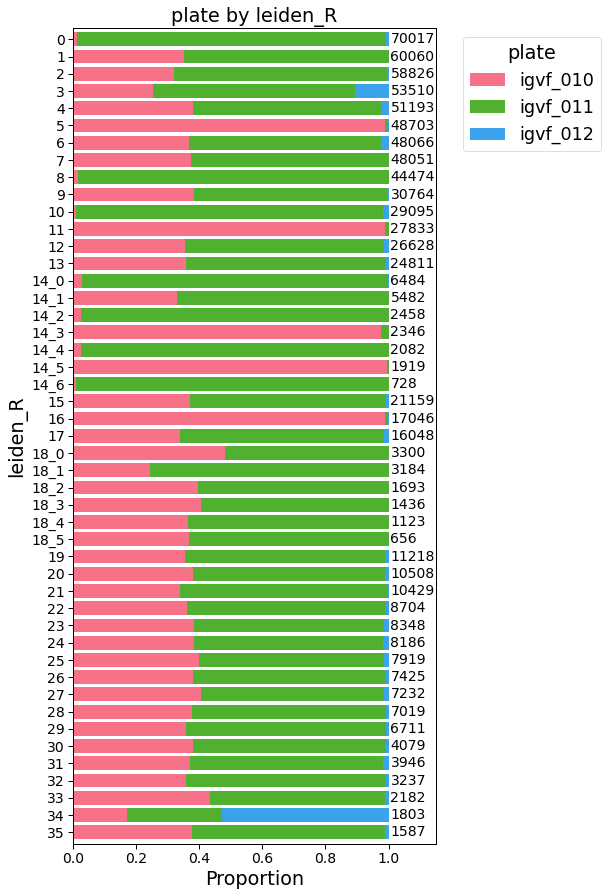

In [11]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'plate',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = plate_palette,
                            annotations = True)


In [12]:
marker_genes_dict = {
    "Type2B_Myonuclei": ["Mybpc2","Actn3"],
    "Type2X_Myonuclei": ["Myh1"],
    "Type2A_Myonuclei": ["Myh2"],
    "FAP": ["Pdgfra","Cd34"],
    "Endothelial": ["Flt1","Pecam1","Kdr"],
    "MTJ": ["Col22a1"],
    "Smooth_muscle": ["Myh11","Acta2"],
    "Type1_Myonuclei": ["Myh7","Atp2a2"],
    "NMJ": ["Etv5","Chrne","Colq","Musk"],
    "Tenocyte": ["Dcn","Col1a1"],
    "Macrophage": ["F13a1","Adgre1"],
    "Satellite": ["Pax7","Msc"],
    "Schwann1": ["Mpz", "Pmp22", "Prx"], # myelinating
    "Fibroblast":["Bnc2","Col3a1"],
    "Adipocyte": ["Adipoq","Pparg"],
    "Schwann2": ["Scn7a","Slc35f1"], # non-myelinating
    "Lymphatic_endothelial": ["Prox1","Flt4","Lyve1"],
    "Brain": ["Snap25", "Slc17a7"],
    "Kidney": ["Lrp2", "Cubn"],
}

categories: 0, 1, 2, etc.
var_group_labels: Type2B_Myonuclei, Type2X_Myonuclei, Type2A_Myonuclei, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


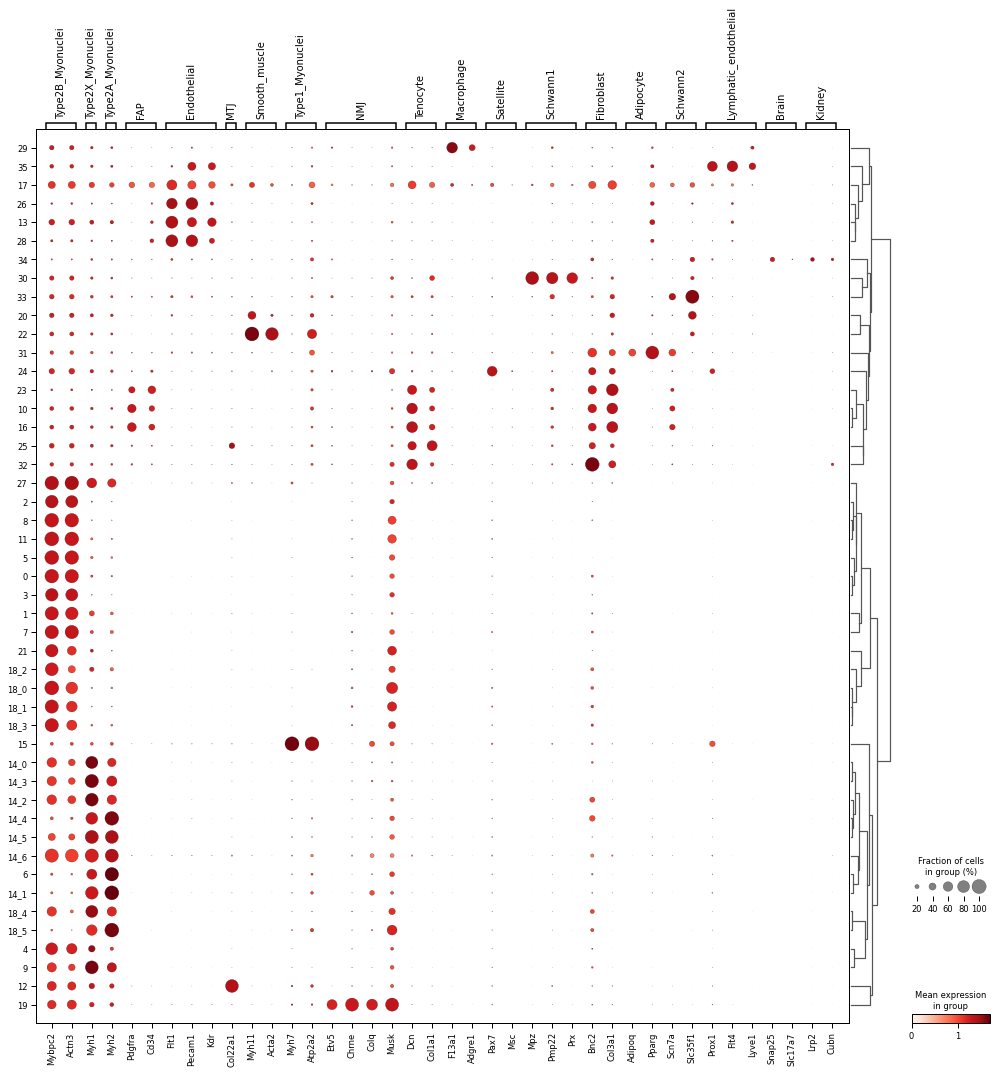

In [13]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden_R', mean_only_expressed = True,
              dendrogram=True, log=True)


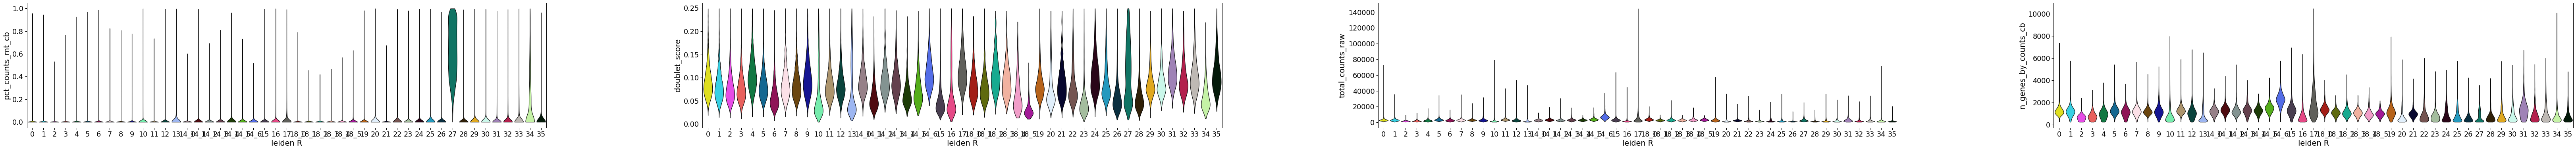

In [14]:
plt.rcParams['figure.figsize'] = (18, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "leiden_R", 
             jitter=0.4, multi_panel=True, size=0)

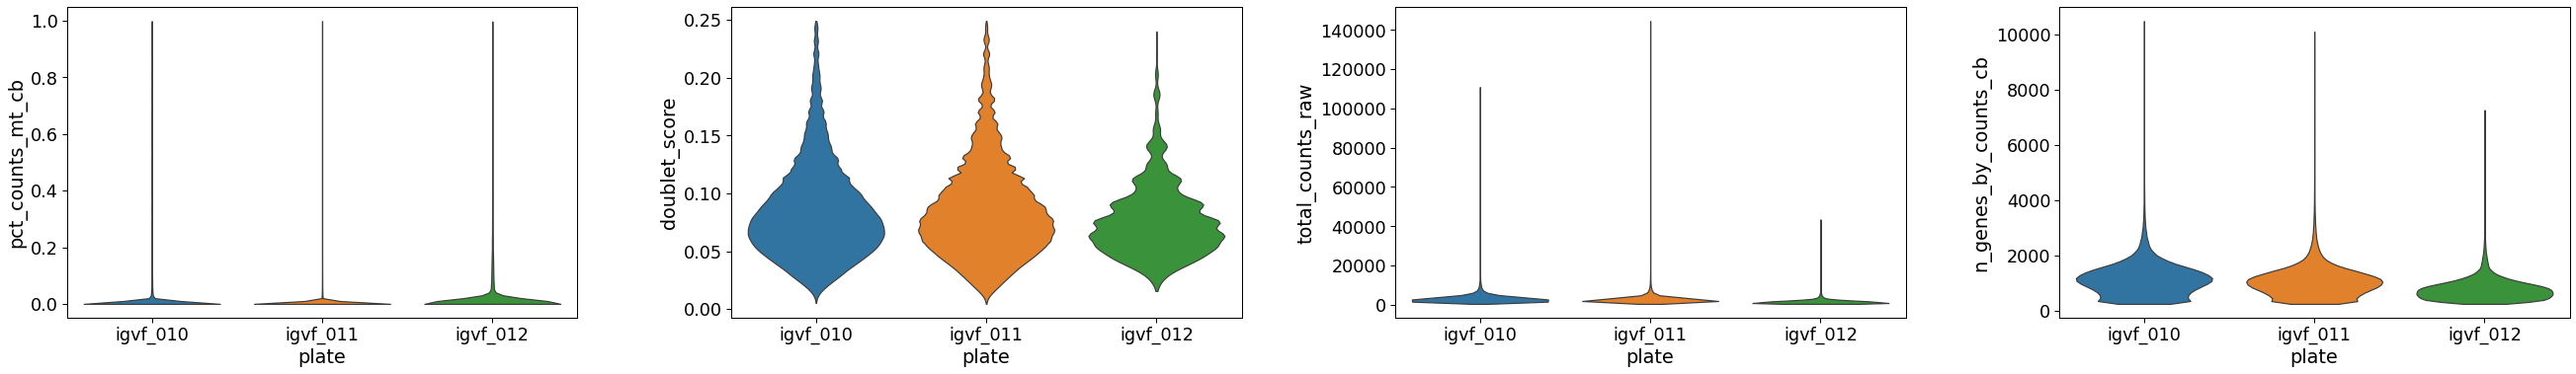

In [15]:
plt.rcParams['figure.figsize'] = (8, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "plate", 
             jitter=0.4, multi_panel=True, size=0)

In [16]:
plt.rcParams['figure.figsize'] = (8, 8)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


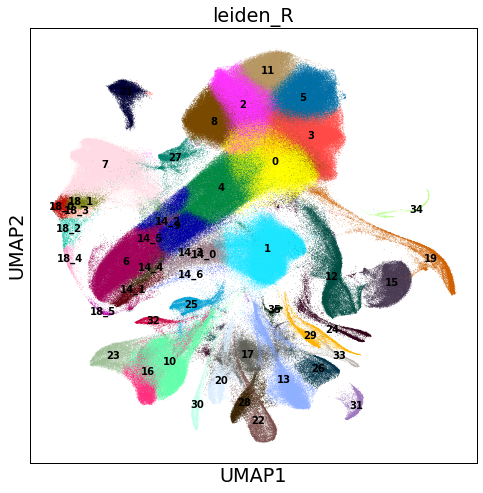

In [17]:
sc.pl.umap(adata, color=['leiden_R'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


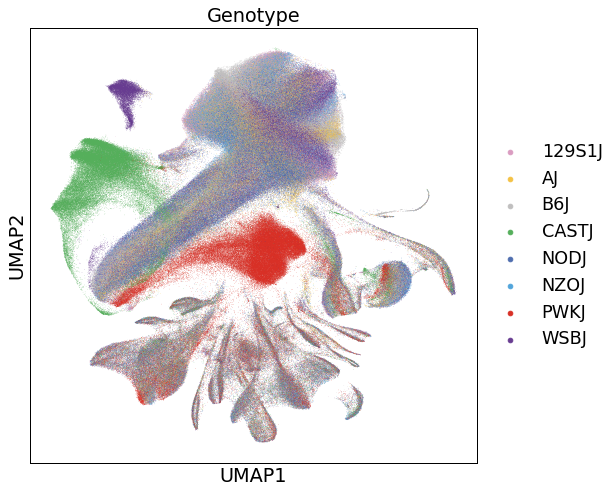

In [18]:
sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


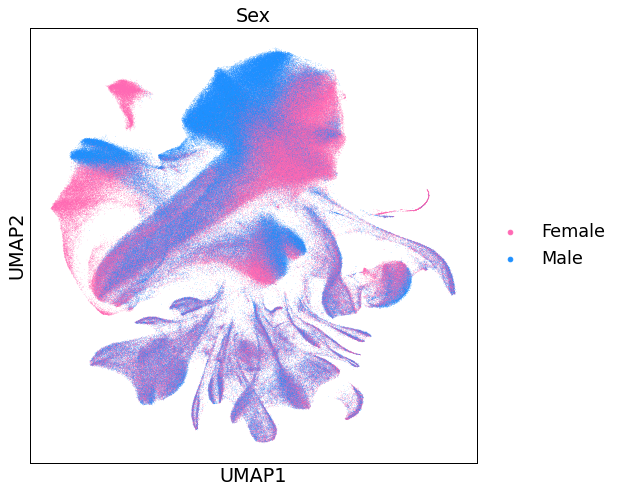

In [19]:
sc.pl.umap(adata, color=['Sex'], size = 0.8, palette = sex_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


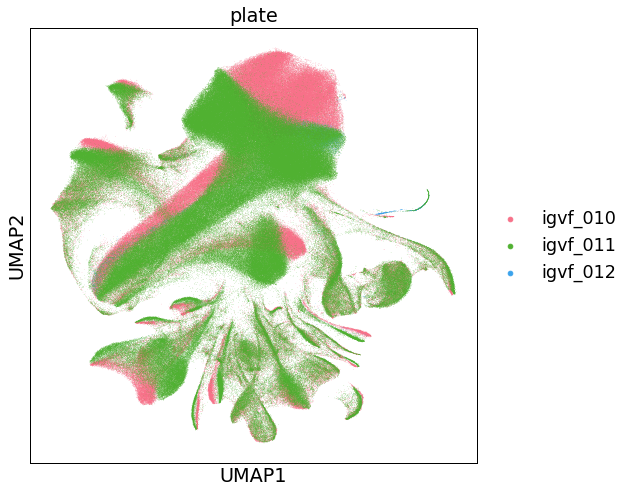

In [20]:
sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)


In [21]:
plt.rcParams['figure.figsize'] = (8, 8)


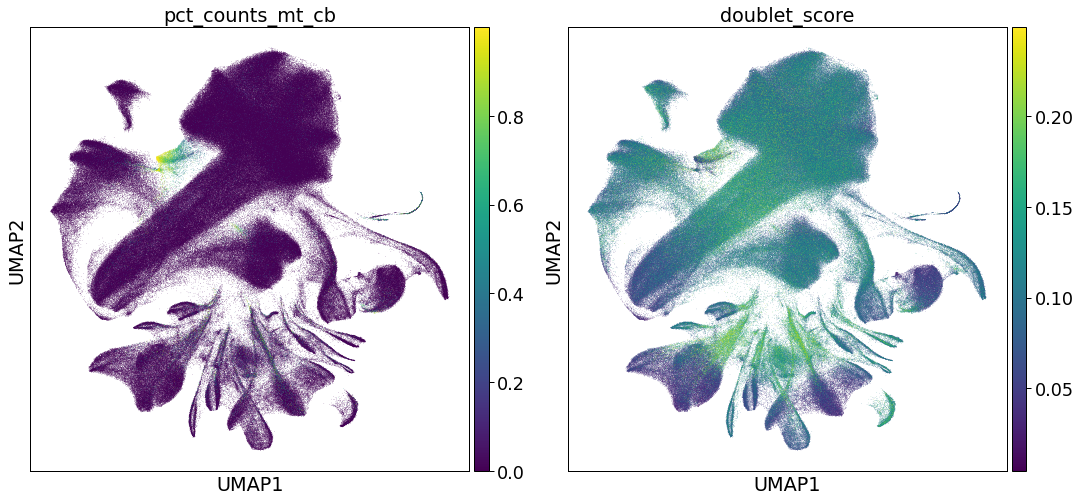

In [22]:
sc.pl.umap(adata, color=['pct_counts_mt_cb','doublet_score'], size = 0.8, palette = plate_palette)


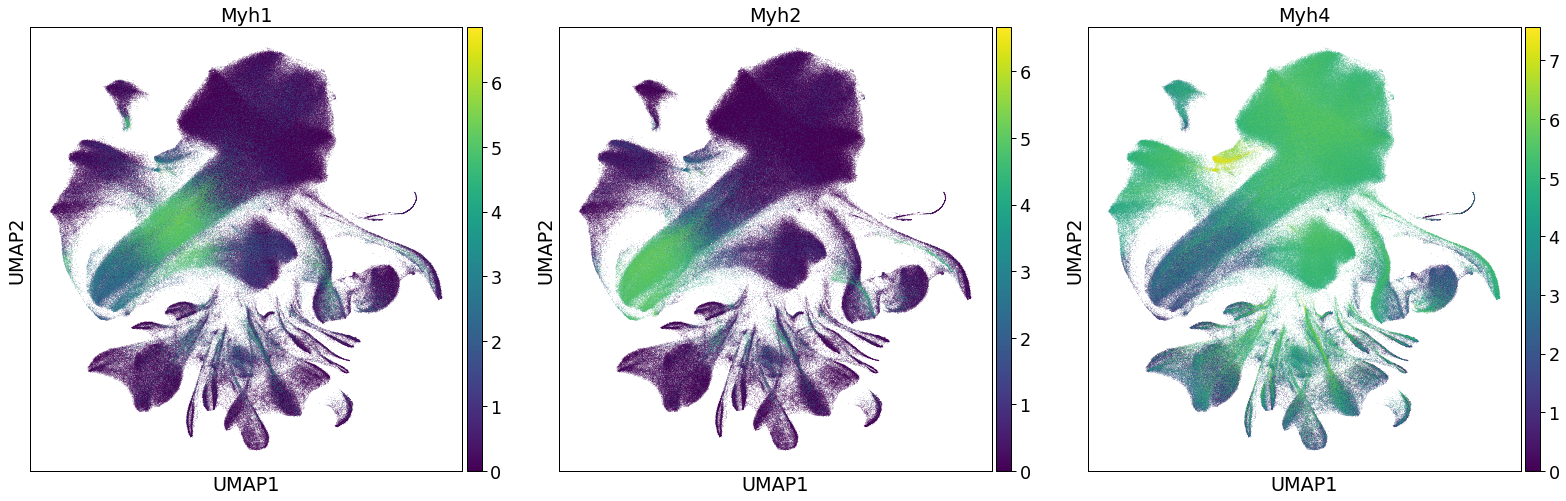

In [23]:
sc.pl.umap(adata, color=['Myh1','Myh2','Myh4'], size = 0.8, palette = plate_palette)


In [24]:
old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')
old_annots['subpool'] = old_annots['subpool'].str.replace(r'Sublibrary_(\d+)', r'Subpool_\1', regex=True)

subpool_mapping = {
    "13A": "Subpool_1",
    "13B": "Subpool_2",
    "13C": "Subpool_3",
    "13D": "Subpool_4",
    "13E": "Subpool_5",
    "13F": "Subpool_6",
    "13G": "Subpool_7",
    "13H": "Subpool_8"
}

# Update the subpool column for the specified plate
old_annots.loc[old_annots['plate'] == 'igvf_012', 'subpool'] = (
    old_annots['subpool'].map(subpool_mapping)
)


old_annots['cellID'] = old_annots['bc1_well'] + "_" + old_annots['bc2_well'] + "_" + old_annots['bc3_well'] + "_" + old_annots['subpool']  + "_" + old_annots['plate'] 



/tmp/ipykernel_851934/134062919.py:1: DtypeWarning: Columns (11,21,22,23,31,36,37,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')


In [25]:
new_cells = adata.obs.index.tolist()
old_cells = old_annots['cellID'].tolist()

new_cells_series = pd.Series(new_cells)
old_cells_series = pd.Series(old_cells)


old_in_new = old_cells_series.isin(new_cells)
new_in_old = new_cells_series.isin(old_cells)


old_not_in_new = old_cells_series[~old_in_new]
new_not_in_old = new_cells_series[~new_in_old]

print(f"Number of old_cells not in new_cells: {len(old_not_in_new)}")

print(f"Number of new_cells not in old_cells: {len(new_not_in_old)}")


Number of old_cells not in new_cells: 61886
Number of new_cells not in old_cells: 159666


In [26]:
old_annots.set_index('cellID', inplace=True)
transfer_df = old_annots[['subtype', 'celltype']]

adata_obs = adata.obs.copy()

# Merge the dataframes, adding the 'subtype' and 'celltype' columns to adata.obs
adata_obs = adata_obs.join(transfer_df, how='left')


In [27]:
# Ensure missing values are explicitly set as NA
adata_obs['subtype'].fillna(value="NA", inplace=True)
adata_obs['celltype'].fillna(value="NA", inplace=True)

In [28]:
adata_obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                         
F12_B6_G1_Subpool_4_igvf_010   045_129S1J_10M_16     NA  igvf_010  Subpool_4   
C9_A10_D11_Subpool_4_igvf_010      026_AJ_10F_16     NA  igvf_010  Subpool_4   
A10_G12_E1_Subpool_4_igvf_010     017_B6J_10M_16     NA  igvf_010  Subpool_4   
D12_C11_G3_Subpool_4_igvf_010    085_PWKJ_10M_16     NA  igvf_010  Subpool_4   
B9_A12_F10_Subpool_4_igvf_010    070_NODJ_10F_16     NA  igvf_010  Subpool_4   

                              SampleType         Tissue     Sex     Age  \
cellID                                                                    
F12_B6_G1_Subpool_4_igvf_010      Nuclei  Gastrocnemius    Male  PNM_02   
C9_A10_D11_Subpool_4_igvf_010     Nuclei  Gastrocnemius  Female  PNM_02   
A10_G12_E1_Subpool_4_igvf_010     Nuclei  Gastrocnemius    Male  PNM_02   
D12_C11_G3_Subpool_4_igvf_010     Nuclei  Gastrocnemius    Male  PNM_02   
B9_A12_F10_Subpool_4_igvf_010     Nuclei  Gastrocnemius  Female  PNM_02   

                              Genotype subpool_type  ... doublet_score  \
cellID                                               ...                 
F12_B6_G1_Subpool_4_igvf_010    129S1J           NO  ...      0.150838   
C9_A10_D11_Subpool_4_igvf_010       AJ           NO  ...      0.170909   
A10_G12_E1_Subpool_4_igvf_010      B6J           NO  ...      0.157895   
D12_C11_G3_Subpool_4_igvf_010     PWKJ           NO  ...      0.152416   
B9_A12_F10_Subpool_4_igvf_010     NODJ           NO  ...      0.108742   

                              predicted_doublet background_fraction  \
cellID                                                                
F12_B6_G1_Subpool_4_igvf_010              False            0.002609   
C9_A10_D11_Subpool_4_igvf_010             False            0.001864   
A10_G12_E1_Subpool_4_igvf_010             False            0.002032   
D12_C11_G3_Subpool_4_igvf_010             False            0.004341   
B9_A12_F10_Subpool_4_igvf_010             False            0.008676   

                              cell_probability     cell_size  \
cellID                                                         
F12_B6_G1_Subpool_4_igvf_010          0.999955  25984.625000   
C9_A10_D11_Subpool_4_igvf_010         0.999955  22219.892578   
A10_G12_E1_Subpool_4_igvf_010         0.999955  16961.167969   
D12_C11_G3_Subpool_4_igvf_010         0.999955  16142.116211   
B9_A12_F10_Subpool_4_igvf_010         0.999955  14029.944336   

                              droplet_efficiency leiden leiden_R  \
cellID                                                             
F12_B6_G1_Subpool_4_igvf_010            2.499986     15       15   
C9_A10_D11_Subpool_4_igvf_010           2.499726     17       17   
A10_G12_E1_Subpool_4_igvf_010           2.490600     17       17   
D12_C11_G3_Subpool_4_igvf_010           2.468910     17       17   
B9_A12_F10_Subpool_4_igvf_010           2.491544     16       16   

                                                        subtype  \
cellID                                                            
F12_B6_G1_Subpool_4_igvf_010   fibro/adipogenic progenitor cell   
C9_A10_D11_Subpool_4_igvf_010                  endothelial cell   
A10_G12_E1_Subpool_4_igvf_010                                NA   
D12_C11_G3_Subpool_4_igvf_010                  endothelial cell   
B9_A12_F10_Subpool_4_igvf_010  fibro/adipogenic progenitor cell   

                                                       celltype  
cellID                                                           
F12_B6_G1_Subpool_4_igvf_010   fibro/adipogenic progenitor cell  
C9_A10_D11_Subpool_4_igvf_010                  endothelial cell  
A10_G12_E1_Subpool_4_igvf_010                                NA  
D12_C11_G3_Subpool_4_igvf_010                  endothelial cell  
B9_A12_F10_Subpool_4_igvf_010  fibro/adipogenic progenitor cell  

[5 rows x 51 columns]

In [29]:
adata.obs['celltype_carryover'] = adata_obs['celltype']
adata.obs['subtype_carryover'] = adata_obs['subtype']

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


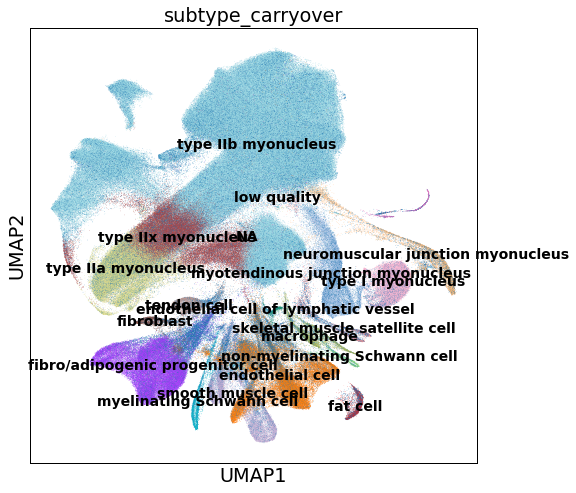

In [30]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1, legend_fontsize = 14, legend_loc = "on data")


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


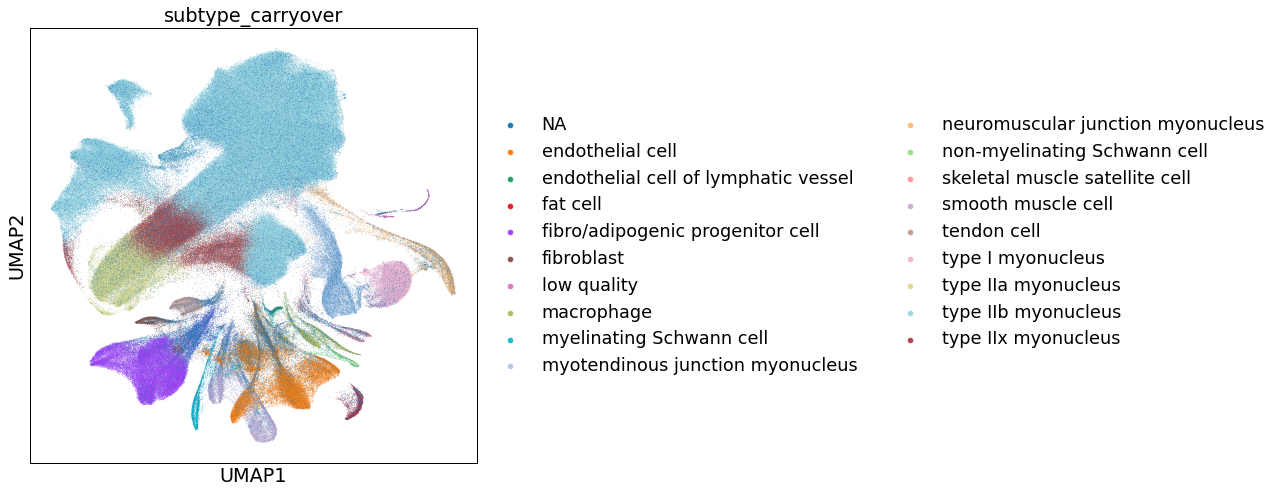

In [31]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


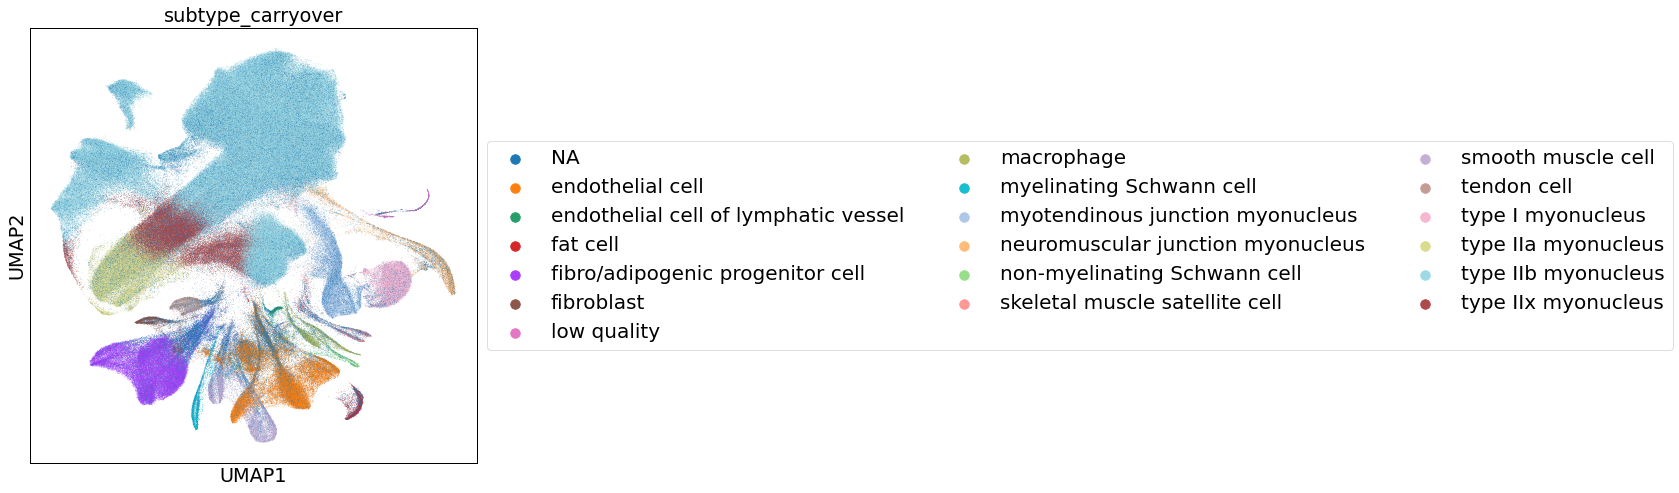

In [32]:
# Plot UMAP
ax = sc.pl.umap(adata, color=['subtype_carryover'], size=1, legend_fontsize=20, show=False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=2, fontsize=20, ncol=3)
plt.show()

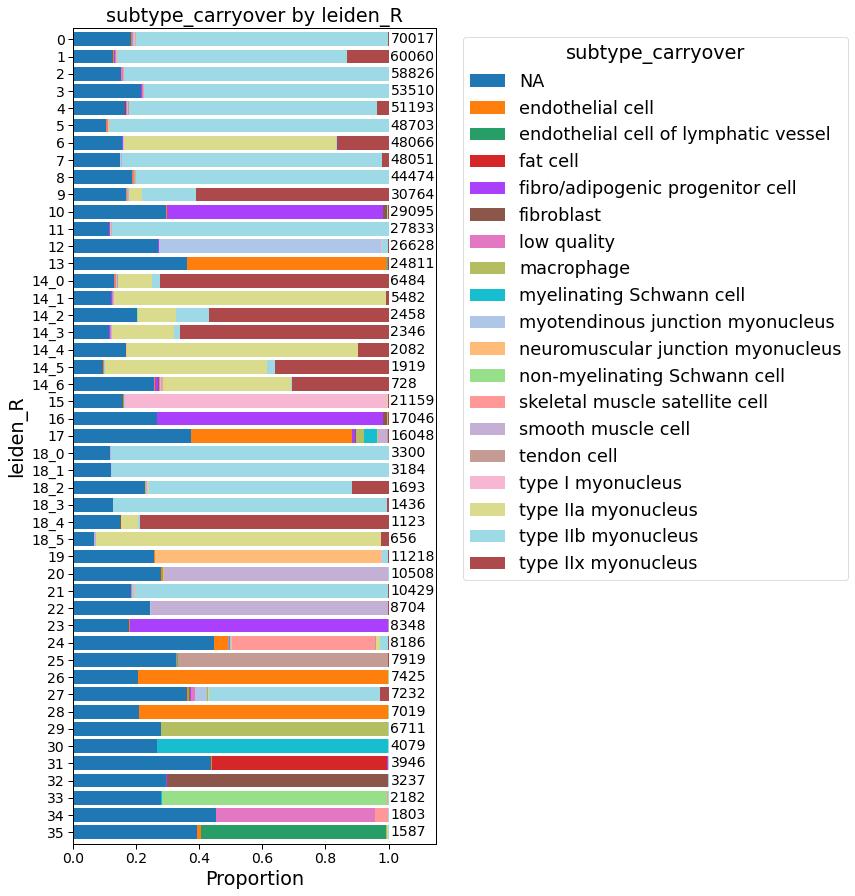

In [33]:
stacked_barplot_proportions(adata.obs, 
                            'leiden_R', 'subtype_carryover',
                            reverse_order = True,
                            custom_colors = adata.uns["subtype_carryover_colors"],
                            fsize = (6.5,15), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


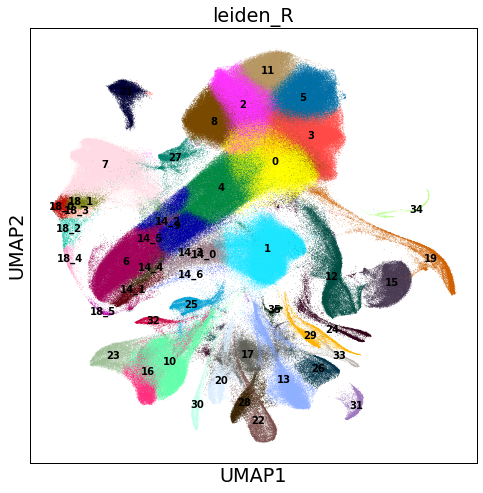

In [34]:
sc.pl.umap(adata, color=['leiden_R'], size=1, legend_fontsize = 10, legend_loc = 'on data')


In [39]:
annots = pd.read_csv("post_cellbender_annotations.csv")
annots = annots[annots['tissue'] == tissue]
annots['leiden_R'] = annots['leiden_R'].astype(str)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden_R'].map(annotation_dict)
annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden_R'].map(annotation_dict)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden_R'].map(annotation_dict)
annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden_R'].map(annotation_dict)

annotation_dict = annots.groupby('leiden_R').head(1).set_index('leiden_R')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden_R'].map(annotation_dict)



/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


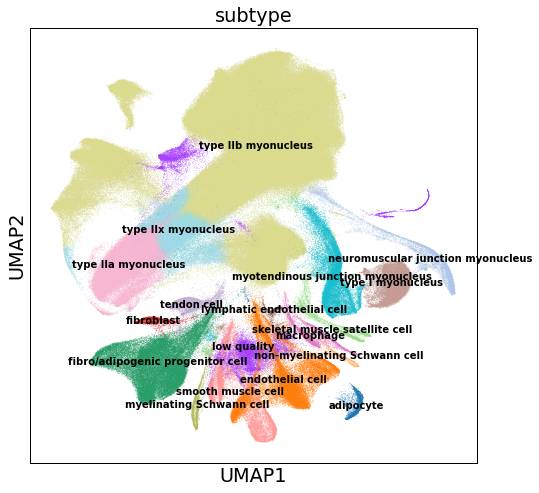

In [40]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


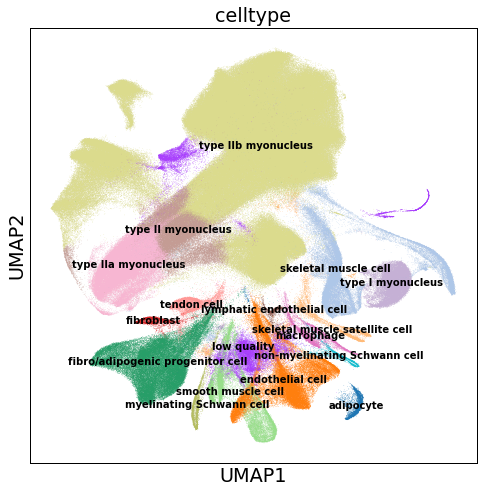

In [41]:
sc.pl.umap(adata, color=['celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


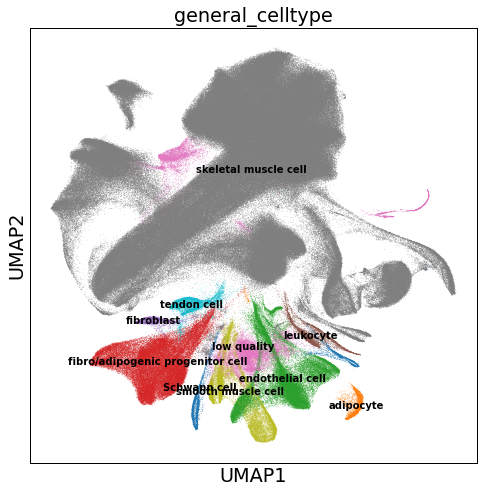

In [42]:
sc.pl.umap(adata, color=['general_celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


In [43]:
adata.obs.drop(columns='celltype_carryover', inplace=True)
adata.obs.drop(columns='subtype_carryover', inplace=True)


In [44]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/cellbender_tissues/obs_tables/{tissue}_annotated_metadata.csv")


In [45]:
adata

AnnData object with n_obs × n_vars = 819708 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'leiden_R', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_R', 'log1

In [46]:
adata.write_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_annotated.h5ad')
